# ML model for crypto forecast

## Import of data and libraries 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../data/Data_BTC.csv")

In [5]:
print(df.shape)
df.head()

(256, 13)


,Date,weighted_positive_score,weighted_neutral_score,weighted_negative_score,total,is_missing_value,Open,High,Low,Close,Adj Close,Volume,market_value
0,2021-02-05,0.299347,0.602728,0.097925,7705495.0,0,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,37537.927734
1,2021-02-06,0.358841,0.565735,0.075424,16580043.0,0,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,38702.199219
2,2021-02-07,0.378946,0.395909,0.225145,12031397.0,0,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,39076.816406
3,2021-02-08,0.509324,0.390879,0.099797,48100078.0,0,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,42541.646484
4,2021-02-09,0.571424,0.277535,0.151041,31872015.0,0,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,46333.048828


Text(0, 0.5, 'Prices ($)')

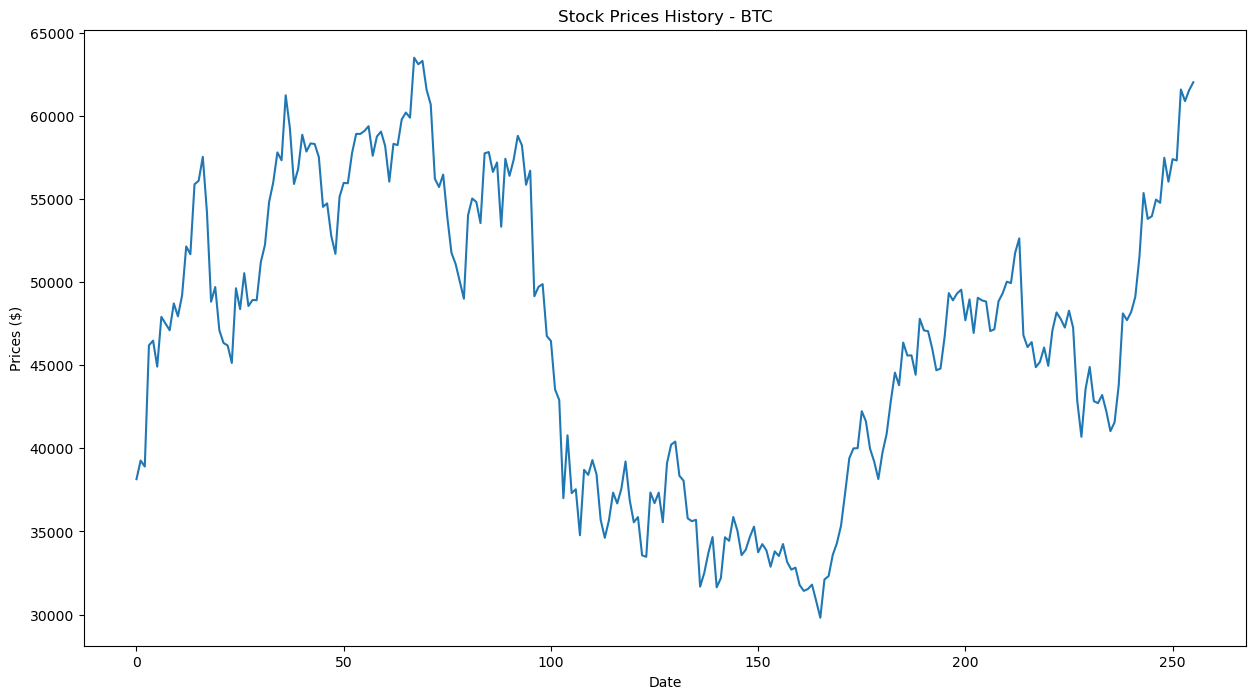

In [6]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History - BTC')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

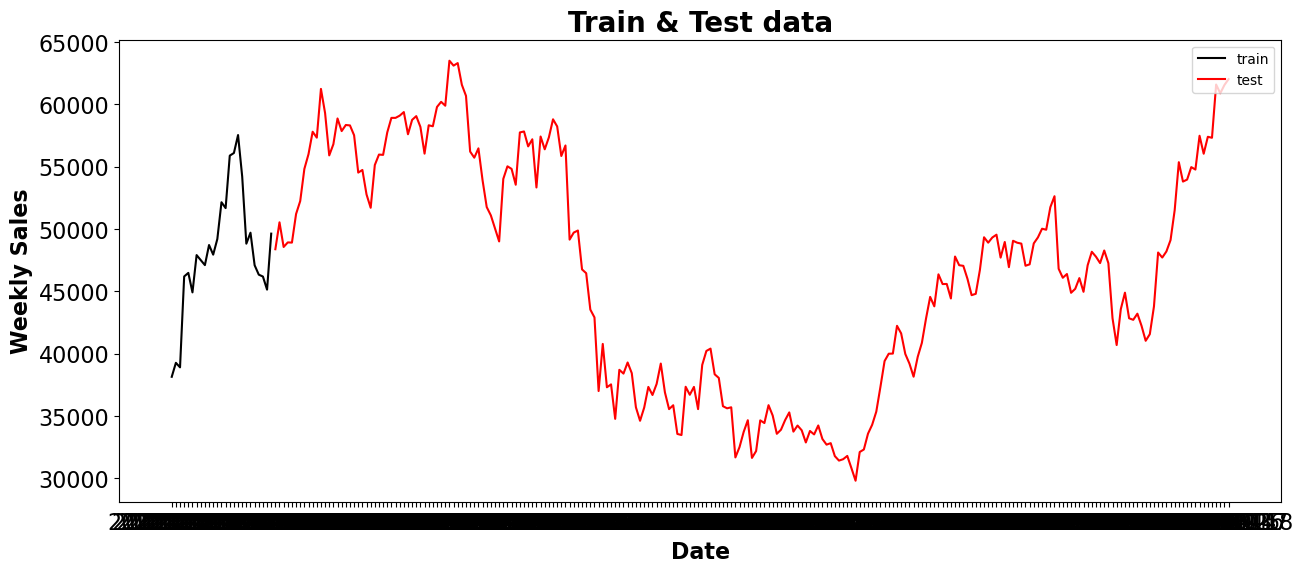

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = df['Date'][:25], y = df['Close'][:25], color = 'black')
sns.lineplot(x = df['Date'][25:], y = df['Close'][25:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.show()

In [2]:
import numpy as np 


pred = np.array([53084.76171875, 55923.03125   , 56065.0078125 , 58260.5078125 ,
       58092.96875   , 60853.8125    , 59534.80078125, 56713.41796875,
       56890.015625  , 59300.52734375, 58383.96484375, 58705.421875  ,
       58589.40625   , 57869.41015625, 54911.8671875 , 54819.37890625,
       52884.12890625, 51677.44140625, 55035.5078125 , 56273.375     ,
       56310.078125  , 57819.19921875, 59064.5390625 , 59325.91796875,
       59245.59375   , 59606.00390625, 57863.46875   , 58850.84765625,
       59186.48828125, 58500.15625   , 56273.51171875, 58175.2421875 ,
       58492.3671875 , 60095.62890625, 60197.8125    , 60456.703125  ,
       63504.765625  , 62862.203125  , 64004.12109375, 61888.90234375,
       60806.859375  , 56571.58984375, 55580.40234375, 56534.20703125,
       54043.5       , 51983.13671875, 50910.67578125, 49990.98828125,
       49205.98046875, 53808.9609375 , 55155.2265625 , 55863.3046875 ,
       53537.3359375 , 57650.94140625, 58083.1015625 , 57403.02734375,
       57138.37109375, 53307.53515625, 57259.6796875 , 56249.3984375 ,
       57791.26953125, 58604.40625   , 58519.1796875 , 56046.015625  ,
       56429.32421875, 49877.2265625 , 49264.46484375, 49172.19921875,
       47609.453125  , 45866.14453125, 43383.12890625, 42936.8046875 ,
       37247.62890625, 40260.97265625, 37325.61328125, 37540.8515625 ,
       34712.78515625, 38174.23828125, 38321.09765625, 39309.76171875,
       38397.5703125 , 36071.45703125, 34247.5234375 , 35222.421875  ,
       37176.8359375 , 36803.37890625, 37698.06640625, 39132.69921875,
       37601.2109375 , 35468.63671875, 35544.6875    , 33860.578125  ,
       33070.7421875 , 36903.4765625 , 37233.75      , 37567.25      ,
       35886.26171875, 38613.7421875 , 40341.140625  , 40771.75      ,
       38830.7578125 , 37683.609375  , 36017.421875  , 35359.5234375 ,
       35603.703125  , 32266.125     , 32025.30078125, 33361.890625  ,
       34423.9765625 , 32527.31054688, 31829.73046875, 34374.73046875,
       34446.63671875, 35762.07421875, 35336.51953125, 33814.28125   ,
       33640.15234375, 34478.69921875, 35394.4296875 , 33961.69921875,
       34151.546875  , 33867.75      , 32992.91796875, 33562.375     ,
       33615.31640625, 34199.37890625, 33457.55078125, 32638.51171875,
       32922.69921875, 31860.23242188, 31436.46289062, 31399.99023438,
       31803.2734375 , 30935.12109375, 29871.89453125, 31912.03320312,
       32291.79101562, 33583.01171875, 34244.80078125, 35455.390625  ,
       37391.390625  , 39305.6328125 , 40528.89453125, 40027.20703125,
       42292.23046875, 41741.578125  , 40382.4140625 , 39267.7265625 ,
       38195.83984375, 39492.2734375 , 40865.2734375 , 42775.01953125,
       44901.08203125, 44072.359375  , 46458.14453125, 45826.12890625,
       45623.1015625 , 44602.7578125 , 47482.9765625 , 47363.21875   ,
       47204.5625    , 46190.79296875, 44724.3984375 , 44599.1953125 ,
       46429.53125   , 49286.40234375, 49111.7734375 , 49437.69140625,
       49796.73828125, 47682.01953125, 48872.16015625, 47240.9765625 ,
       48860.16796875, 48982.42578125, 48918.16015625, 47421.97265625,
       47057.1484375 , 48724.99609375, 49318.5625    , 50071.90234375,
       49983.87109375, 51689.13671875, 52689.1015625 , 47802.14453125,
       46187.8359375 , 46166.5390625 , 44478.13671875, 45034.1875    ,
       45916.1875    , 45093.8203125 , 46920.609375  , 48326.0078125 ,
       47936.89453125, 47383.453125  , 48271.1015625 , 47451.        ,
       43713.29296875, 40535.765625  , 43179.171875  , 44759.67578125,
       43012.578125  , 42613.22265625, 43224.0859375 , 42174.30078125,
       41137.30859375, 41436.1875    , 43642.046875  , 48203.515625  ,
       47964.83984375, 48505.9609375 , 49246.2265625 , 51440.8828125 ,
       55517.46875   , 54134.62109375, 54257.92578125, 54936.3359375 ,
       54780.51171875, 57335.578125  , 56316.765625  , 57358.22265625,
       57354.91015625, 61438.95703125, 61015.640625  , 61704.421875  ])

In [4]:
pred

array([53084.76171875, 55923.03125   , 56065.0078125 , 58260.5078125 ,
       58092.96875   , 60853.8125    , 59534.80078125, 56713.41796875,
       56890.015625  , 59300.52734375, 58383.96484375, 58705.421875  ,
       58589.40625   , 57869.41015625, 54911.8671875 , 54819.37890625,
       52884.12890625, 51677.44140625, 55035.5078125 , 56273.375     ,
       56310.078125  , 57819.19921875, 59064.5390625 , 59325.91796875,
       59245.59375   , 59606.00390625, 57863.46875   , 58850.84765625,
       59186.48828125, 58500.15625   , 56273.51171875, 58175.2421875 ,
       58492.3671875 , 60095.62890625, 60197.8125    , 60456.703125  ,
       63504.765625  , 62862.203125  , 64004.12109375, 61888.90234375,
       60806.859375  , 56571.58984375, 55580.40234375, 56534.20703125,
       54043.5       , 51983.13671875, 50910.67578125, 49990.98828125,
       49205.98046875, 53808.9609375 , 55155.2265625 , 55863.3046875 ,
       53537.3359375 , 57650.94140625, 58083.1015625 , 57403.02734375,
      